# Modelling - PART 1
### Exploring correlations, feature engineering, etc 
Read model_data.csv<br>
Basic exploration of data - mean, min, max,...<b>
Check for outliers<br>
Look at correlations and Pairplotting<br>
Log transform target <br>
Try feature Engineering

### 1. Setting up notebook

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline
%pylab inline 
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

### 2. Reading from the file

In [3]:
# read data
df_model = pd.read_csv('../data/model_data.csv')
df_model = df_model.drop(columns ="Unnamed: 0")
df_model.head()

price  year  mileage  drive_type  engine_size  num_cylinders   hp  \
0  19998.0  2016    31000           2          2.4              4  201   
1  26998.0  2013    48000           4          3.0              6  272   
2  41998.0  2013    37000           4          4.2              8  450   
3  22998.0  2011    41000           4          2.0              4  265   
4  20998.0  2015    14000           4          2.0              4  180   

   comp_ratio  bore  stroke  values_per_cylinder  wheel_base  length  width  \
0        12.0  3.43    3.90                  4.0       105.1   181.9   70.0   
1        10.0  3.33    3.50                  0.0       110.5   182.6   74.0   
2        13.0  3.33    3.65                  0.0       108.3   183.0   73.0   
3         9.8  3.25    3.65                  4.0        97.2   165.3   72.0   
4        11.0  3.31    3.55                  4.0       110.6   182.1   71.0   

   height  curb_weight  leg_room  head_room  seating_cap  cargo_cap  city_mpg  \
0    55.0         2970      42.3       38.0            5       12.0        25   
1    65.0         4345      41.0       38.1            5       57.0        18   
2    53.0         3924      41.3       39.1            4       12.0        16   
3    53.0         3241      41.1       37.7            4       13.0        21   
4    56.0         3450      42.0       40.3            5       17.0        23   

   hw_mpg  luxury  black_interior  dark_exterior  light_exterior  \
0      35       1               1              1               0   
1      26       1               1              1               0   
2      23       1               1              0               1   
3      29       1               1              0               0   
4      35       1               0              0               0   

   prime_exterior  normal_engine  turbo_engine  alternate_engine  
0               0              1             0                 0  
1               0              0             1                 0  
2               0              1             0                 0  
3               1              0             1                 0  
4               1              0             1                 0

### 3. Basic Exploration
describe(), corr()

In [4]:
df_model.describe()

price         year        mileage   drive_type  engine_size  \
count   1781.000000  1781.000000    1781.000000  1781.000000  1781.000000   
mean   20670.918024  2014.633914   40684.446940     2.625491     2.739001   
std     8445.070985     2.272616   25418.172955     0.927484     1.056598   
min     6599.000000  2007.000000    1000.000000     2.000000     0.060000   
25%    14599.000000  2014.000000   23000.000000     2.000000     2.000000   
50%    18998.000000  2015.000000   36000.000000     2.000000     2.500000   
75%    24998.000000  2016.000000   52000.000000     4.000000     3.500000   
max    56998.000000  2018.000000  127000.000000     4.000000     6.700000   

       num_cylinders           hp   comp_ratio         bore       stroke  \
count    1781.000000  1781.000000  1781.000000  1781.000000  1781.000000   
mean        4.903425   224.472768    10.652499     3.417945     3.485862   
std         1.265663    79.668555     0.989462     0.422044     0.417395   
min         2.000000     0.000000     8.200000     0.000000     0.000000   
25%         4.000000   170.000000    10.000000     3.250000     3.270000   
50%         4.000000   198.000000    10.500000     3.460000     3.480000   
75%         6.000000   285.000000    11.000000     3.700000     3.700000   
max         8.000000   577.000000    17.000000     4.210000     4.880000   

       values_per_cylinder   wheel_base       length        width  \
count          1781.000000  1781.000000  1781.000000  1635.000000   
mean              3.829309   110.150983   186.515328    72.673211   
std               0.681254     9.560084    15.870465     3.645608   
min               0.000000    73.500000   106.100000    61.000000   
25%               4.000000   105.700000   178.500000    70.000000   
50%               4.000000   109.200000   187.800000    72.000000   
75%               4.000000   112.200000   191.900000    75.000000   
max               4.000000   172.400000   263.000000    97.000000   

            height  curb_weight     leg_room    head_room  seating_cap  \
count  1779.000000  1781.000000  1764.000000  1774.000000  1781.000000   
mean     61.953963  3672.571028    42.279308    39.424352     5.239191   
std       6.604821   791.935626     1.318793     1.223051     1.067946   
min      48.000000  1830.000000    38.900000    34.800000     2.000000   
25%      57.000000  3183.000000    41.300000    38.600000     5.000000   
50%      59.000000  3528.000000    42.100000    39.400000     5.000000   
75%      66.700000  4078.000000    43.000000    40.100000     5.000000   
max     110.000000  7241.000000    45.900000    46.800000    15.000000   

         cargo_cap     city_mpg       hw_mpg       luxury  black_interior  \
count  1673.000000  1781.000000  1781.000000  1781.000000     1781.000000   
mean     23.299761    22.617069    30.280741     0.208310        0.660865   
std      18.758721     6.524407     6.216579     0.406214        0.473549   
min       4.000000    10.000000    15.000000     0.000000        0.000000   
25%      14.000000    18.000000    25.000000     0.000000        0.000000   
50%      16.000000    22.000000    30.000000     0.000000        1.000000   
75%      25.000000    25.000000    35.000000     0.000000        1.000000   
max     150.000000    54.000000    50.000000     1.000000        1.000000   

       dark_exterior  light_exterior  prime_exterior  normal_engine  \
count    1781.000000     1781.000000     1781.000000    1781.000000   
mean        0.386861        0.375070        0.238069       0.667602   
std         0.487168        0.484277        0.426021       0.471205   
min         0.000000        0.000000        0.000000       0.000000   
25%         0.000000        0.000000        0.000000       0.000000   
50%         0.000000        0.000000        0.000000       1.000000   
75%         1.000000        1.000000        0.000000       1.000000   
max         1.000000        1.000000        1.000000       1.000000   

       turbo

In [5]:
# check for outlier in numeric variables
for i in range (22):
    m = df_model.iloc[:,i].mean()
    s = df_model.iloc[:,i].std()
    mx = df_model.iloc[:,i].max() 
    if (mx>m+4*s):
        print("check for outliers",i)

check for outliers 0
check for outliers 6
check for outliers 7
check for outliers 11
check for outliers 12
check for outliers 13
check for outliers 14
check for outliers 15
check for outliers 17
check for outliers 18
check for outliers 19
check for outliers 20


0 - price - max price is reasonable<br>
4 - engine_size - reasonable<br>
6 - hp - reasonable - mustang stingray , Mercedes-Benz,CLS63 <br>
7 - comp_ratio - reasonble <br>
11 - wheelbase - chvy silverado<br>
12 - width, length, height - reasonable<br>
curb weight  - ram clt 3500<br>
mpg - hybrids ... <br>
cargo cap is stated for SUVs with seat down (max possible cargo) ... high variance ... probably not a good predictor

In [6]:
df_model.corr()

price      year   mileage  drive_type  engine_size  \
price                1.000000  0.384552 -0.370825    0.530425     0.612884   
year                 0.384552  1.000000 -0.727101    0.119358    -0.042481   
mileage             -0.370825 -0.727101  1.000000   -0.076268     0.091342   
drive_type           0.530425  0.119358 -0.076268    1.000000     0.323760   
engine_size          0.612884 -0.042481  0.091342    0.323760     1.000000   
num_cylinders        0.626867 -0.047260  0.083765    0.314707     0.934649   
hp                   0.715944  0.064159  0.002075    0.346602     0.853440   
comp_ratio           0.069940  0.081529 -0.046109   -0.068982     0.054257   
bore                 0.306563  0.074645 -0.026319    0.161015     0.502689   
stroke              -0.007874  0.104729 -0.088751   -0.067641     0.010368   
values_per_cylinder -0.096836  0.228500 -0.173894   -0.065663    -0.336343   
wheel_base           0.458269  0.024070  0.048223    0.214675     0.643044   
length               0.444831  0.045610  0.049766    0.180159     0.654369   
width                0.588574  0.122401 -0.017110    0.324995     0.691146   
height               0.470919  0.092776  0.013669    0.506218     0.531277   
curb_weight          0.720288  0.072833  0.022445    0.494770     0.805809   
leg_room            -0.026165  0.082076 -0.034809   -0.145195    -0.029246   
head_room            0.146248  0.032404  0.053543    0.278932     0.253532   
seating_cap          0.339147  0.133319  0.016131    0.248166     0.382680   
cargo_cap            0.070996 -0.269247  0.280848    0.236452     0.264260   
city_mpg            -0.448813  0.076207 -0.093126   -0.373717    -0.687515   
hw_mpg              -0.574579  0.080844 -0.096799   -0.522918    -0.767665   
luxury               0.306337 -0.060966  0.015892    0.137100     0.127608   
black_interior       0.079220  0.177427 -0.152184    0.025322    -0.022236   
dark_exterior        0.060501  0.006715 -0.020397    0.041076     0.016795   
light_exterior      -0.004316  0.036521  0.005604   -0.012293     0.036833   
prime_exterior      -0.064278 -0.049194  0.016954   -0.032998    -0.061076   
normal_engine       -0.197043 -0.110549  0.080593   -0.058758     0.141420   
turbo_engine         0.216262  0.126178 -0.141994    0.122370    -0.233888   
alternate_engine     0.018040  0.002716  0.058510   -0.064926     0.086028   

                     num_cylinders        hp  comp_ratio      bore    stroke  \
price                     0.626867  0.715944    0.069940  0.306563 -0.007874   
year                     -0.047260  0.064159    0.081529  0.074645  0.104729   
mileage                   0.083765  0.002075   -0.046109 -0.026319 -0.088751   
drive_type                0.314707  0.346602   -0.068982  0.161015 -0.067641   
engine_size               0.934649  0.853440    0.054257  0.502689  0.010368   
num_cylinders             1.000000  0.859489    0.065689  0.406111 -0.135517   
hp                        0.859489  1.000000   -0.014130  0.429190 -0.089972   
comp_ratio                0.065689 -0.014130    1.000000  0.011243  0.055841   
bore                      0.406111  0.429190    0.011243  1.000000  0.641118   
stroke                   -0.135517 -0.089972    0.055841  0.641118  1.000000   
values_per_cylinder      -0.318845 -0.208525    0.068641 -0.141436 -0.003671   
wheel_base                0.604143  0.603393   -0.000397  0.254109 -0.054019   
length                    0.580262  0.608584   -0.019566  0.302570  0.003480   
width                     0.650268  0.716541   -0.027416  0.316502 -0.067400   
height                    0.508185  0.403988   -0.048715  0.201107 -0.114987   
curb_weight               0.782268  0.795433    0.011100  0.377812 -0.072229   
leg_room                 -0.059150  0.035287    0.050064  0.038407  0.030292   
head_room                 0.220689  0.152615   -0.115653  0.081912 -0.124960   
seating_cap               0.375377  0.295015    0.037873  0.214221 -0.000816   
cargo

Notes: engine_size and num_cylinders are highly correlated 0.9 so we should drop one of these.<br>
At first glance  - drive_type, engine_size,num_cylinders,hp, curb_weight, hw_mpg seem to correlate well (>0.5) to price. 

### 4. Looking at target

/Users/user/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Price (USD)')

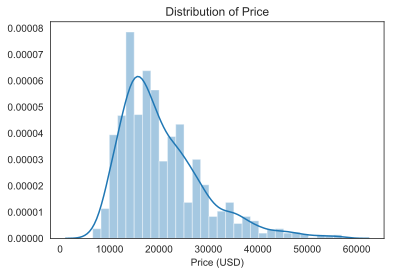

In [7]:
sns.distplot(df_model['price']);
plt.title("Distribution of Price")
plt.xlabel("Price (USD)")

The target is skewed to the right -> log transormation

/Users/user/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Price (log)')

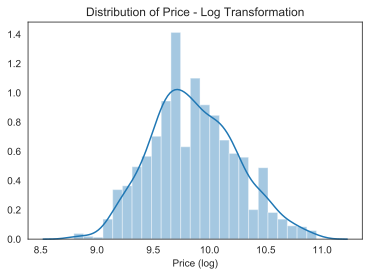

In [20]:
# doing the log transform on y
df_model['price']=df_model.loc[:,'price'].apply(np.log)
sns.distplot(df_model['price']);
plt.title("Distribution of Price - Log Transformation")
plt.xlabel("Price (log)")

Looks more normalized after the tranform

### 5. Pair plotting

In [9]:
# hack the data_set reduce points otherswise system gets stuck with pair plotting
df_hack=df_model.iloc[:200]

In [10]:
sns.pairplot(df_hack,vars=['year', 'price', 'mileage', 'drive_type', 'engine_size',\
       'num_cylinders', 'hp', 'comp_ratio', 'bore', 'stroke',\
       'values_per_cylinder', 'wheel_base'])

Notes :
1. price - log transformations
2. price vs mileage - looks 1/x ish 
3. price vs engine size - looks kind of linear
4. price vs hp - looks kind of linear or many be degree 2 polynomial
5. price vs wheelbase -kind of linear with maybe x2 polynomial
6. No plots look as though they are higher than 2 degrees

### 6. Try Featuring Engineering

In [11]:
df_hack.columns

Index(['price', 'year', 'mileage', 'drive_type', 'engine_size',
       'num_cylinders', 'hp', 'comp_ratio', 'bore', 'stroke',
       'values_per_cylinder', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'leg_room', 'head_room', 'seating_cap', 'cargo_cap',
       'city_mpg', 'hw_mpg', 'luxury', 'black_interior', 'dark_exterior',
       'light_exterior', 'prime_exterior', 'normal_engine', 'turbo_engine',
       'alternate_engine'],
      dtype='object')

##### Price vs curb_weight/hp or hp/curb_weight

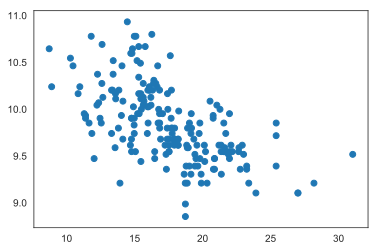

In [12]:
plt.scatter(df_hack['curb_weight']/df_hack['hp'],df_hack['price']);

Looking at curb_weight/hp and hp/curbweight the corr() does'nt seem to increase between corr() more than for either

In [23]:
print(corrcoef(df_model['price'],df_model['curb_weight']/df_model['hp']))
print(corrcoef(df_model['price'],df_model['hp']/df_model['curb_weight']))

[[ 1. nan]
 [nan nan]]
[[1.         0.46313043]
 [0.46313043 1.        ]]


/Users/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2320: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


##### Price vs Mileage 
tried  sqrt function not so good
tried 1/x  which is in the sheet

Text(0.5,0,'1/mileage')

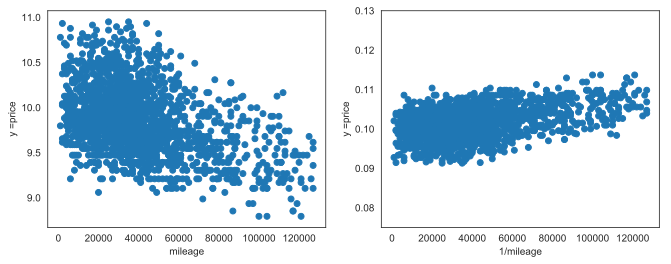

In [14]:
fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(df_model['mileage'],df_model['price']);
ax2.scatter(df_model['mileage'],1/df_model['price']);
ax1.set_ylabel("y =price")
ax1.set_xlabel("mileage")
ax2.set_ylabel("y =price")
ax2.set_xlabel("1/mileage")


Note: The scatterplot loooks more linear but corr() has reduced ... hmm think about it try both later models

<span style="color:blue"> Key takeways - <br>
Able to normalize my target "price" by using a log transformation<br>
Engine_size and num_cylinders are highly correlated  we should drop one of these.<br>
Features that correlate well to price  - drive_type, engine_size,num_cylinders,hp, curb_weight, hw_mpg<br>
Tried some feature engineering - however they don't show great promise<br>
Scatterplot shows that it does'nt look like higher than degree 2 is required for fitting <br>
</span>

In [25]:
print(corrcoef(df_model['price'],1/df_model['mileage']))

[[1.         0.19831846]
 [0.19831846 1.        ]]


### next->model_1